<font color='black'><font size="4">Notebook nettoyage des données --Le plan de ce notebook (Projet 5) est le suivant:</font></font>
<font color='black'><font size="3">
* Lire les fichiers csv et les présenter sous forme des DataFrames
* Nettoyer les DataFrames des valeurs aberrantes
* Analyse exploratoire des DataFrames
* Merge les DataFrames
* Filtrer le DataFrame en gardant les variables pertinentes -- corrMatrix
* DataFrame 2018 cleaning rows
</font></font>  

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pl
import folium
pl.rcParams.update({'font.size':14})
#pip install shapely

## A) Lire les fichiers csv et le présenter sous forme du DataFrame

In [2]:
data_customers = pd.read_csv("olist_customers_dataset.csv")
data_geolocation = pd.read_csv("olist_geolocation_dataset.csv")
data_items = pd.read_csv("olist_order_items_dataset.csv")
data_payments = pd.read_csv("olist_order_payments_dataset.csv")
data_reviews = pd.read_csv("olist_order_reviews_dataset.csv")
data_orders = pd.read_csv("olist_orders_dataset.csv")
data_products = pd.read_csv("olist_products_dataset.csv")
data_sellers = pd.read_csv("olist_sellers_dataset.csv")
data_translation = pd.read_csv("product_category_name_translation.csv")

## B) Nettoyer les DataFrames des valeurs aberrantes

<font color='darkblue'><font size="3"> Des analyses profondes ont été faites afn de nettoyer les dataframes, les données sont propres et prêtes à être explorées. Je n'ai pas gardé l'analyse faite pour ne pas perdre de mémoire.
</font></font>

## C) Analyse exploratoire des DataFrames
<font color='darkblue'><font size="3"> Nous commençons tout d'abord par découvrir les dataframes donnée et présentons les engineering features les plus intéressantes de celle-ci. Certaines features sont supprimé dans cette étape et certaines dataframes ne sont pas sélectionnées.
</font></font>
### C-1) data_customers

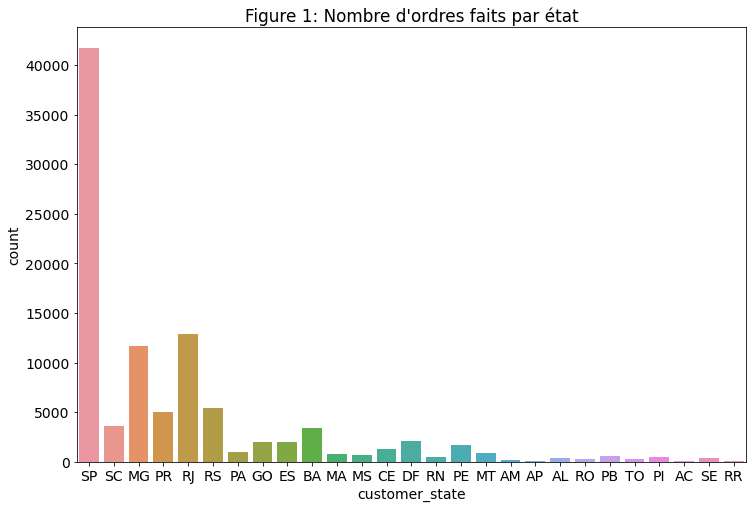

In [3]:
pl.figure(figsize=(12,8))
ax = sns.countplot(x="customer_state", data=data_customers)
pl.title("Figure 1: Nombre d'ordres faits par état")

pl.savefig('Figure1')

Text(0.5, 1.0, 'Figure 2: Nombre des commandes effectuées par des clients uniques')

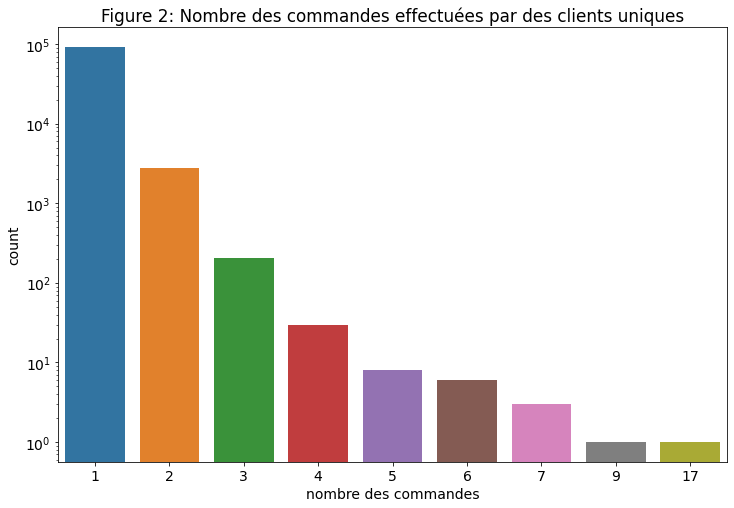

In [4]:
pl.figure(figsize=(12,8))
ax = sns.countplot(x=data_customers['customer_unique_id'].value_counts(), data=data_customers)
ax.set_yscale("log")
ax.set(xlabel="nombre des commandes")
pl.title("Figure 2: Nombre des commandes effectuées par des clients uniques")

### C-2) data_geolocation

<font color='darkblue'><font size="3">
Dans cette partie, voulons visualiser l'emplacement de chaque commande (voir 'Brazil_map.html'), ensuite nous créeons un polygone qui limite les [coordonées du Brézil](https://simplemaps.com/data/br-cities) et nous re-calculons l'emplacement de chaque commande en créeant un polygon (voir 'Brazil_polygon.html')
</font></font>

In [3]:
data_geolocation_clean = data_geolocation.drop_duplicates()

In [4]:
subset_data_geolocation = data_geolocation_clean
locations = subset_data_geolocation[['geolocation_lat','geolocation_lng']]
locationlist = locations.values.tolist()

In [5]:
from folium.plugins import FastMarkerCluster
Brazil_map = folium.Map(location=locationlist[0], zoom_start=3)
Brazil_map.add_child(FastMarkerCluster(locationlist))
Brazil_map.save("Brazil_map.html")    

In [8]:
### MAP BRAZIL

Brazil = pd.read_csv('brazil_coordinates.csv')
from shapely.geometry.polygon import Polygon
from shapely.geometry import Point

lons_lats_vect = np.column_stack((Brazil['lng'], Brazil['lat'])) # Reshape coordinates
polygon = Polygon(lons_lats_vect) # create polygon
array_indice = np.array([])
for i_point in data_geolocation_clean.index:
     point = Point(data_geolocation_clean['geolocation_lng'][i_point],data_geolocation_clean['geolocation_lat'][i_point]) # create point
     if polygon.contains(point) == False: 
        array_indice = np.append(array_indice,i_point)
        
data_geo_final = data_geolocation_clean.drop(index=array_indice)
locations = data_geo_final[['geolocation_lat','geolocation_lng']]
locationlist = locations.values.tolist()

from folium.plugins import FastMarkerCluster

Brazil_map1 = folium.Map(location=locationlist[0], zoom_start=3)
Brazil_map1.add_child(FastMarkerCluster(locationlist))

Brazil_map1.save("Brazil_polygon.html")

<font color='darkblue'><font size="3"> Nous avons trouvé que certaines commandes ont été faites en dehors du Brésil. Et comme les données de chaque client sont cachées (non complètes) vu la protection des clients, ce DataFrame ne peut pas être utilisé dans des études futures.
</font></font>

### C-3) data_items

<font color='darkblue'><font size="3"> 
Pour le dataframe items nous visualisons les commandes effectuées par an.
</font></font>

In [9]:
data_items_clean = data_items.drop_duplicates()
items_len = len(data_items_clean)

In [10]:
mask_2016 = (data_items_clean['shipping_limit_date']>'2016-01-01') & (data_items_clean['shipping_limit_date']<='2016-12-31')
items_2016 = data_items_clean[mask_2016]

In [11]:
mask_2017 = (data_items_clean['shipping_limit_date']>'2017-01-01') & (data_items_clean['shipping_limit_date']<='2017-12-31')
data_items_2017 = data_items_clean[mask_2017]

In [12]:
mask_2018 = (data_items_clean['shipping_limit_date']>'2018-01-01') & (data_items_clean['shipping_limit_date']<='2018-12-30')
data_items_2018 = data_items_clean[mask_2018]

In [13]:
mask_2019 = (data_items_clean['shipping_limit_date']>'2019-01-01') & (data_items_clean['shipping_limit_date']<='2019-12-31')
data_items_2019 = data_items_clean[mask_2019]

In [14]:
mask_2020 = (data_items_clean['shipping_limit_date']>'2020-01-01') & (data_items_clean['shipping_limit_date']<='2020-12-31')
data_items_2020 = data_items_clean[mask_2020]

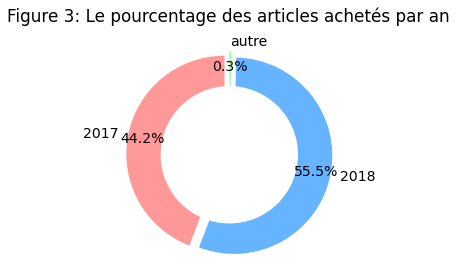

In [15]:
labels = ['2017', '2018','autre']
sizes_2017, sizes_2018 = len(data_items_2017)*100/items_len, len(data_items_2018)*100/items_len 
sizes = [sizes_2017, sizes_2018, 100-(sizes_2017+sizes_2018)]
colors = ['#ff9999','#66b3ff','#99ff99']

explode = (0.05,0.05,0.05)
fig1, ax1 = pl.subplots()
ax1.pie(sizes, colors = colors, labels=labels, autopct='%1.1f%%', startangle=90, pctdistance=0.85, explode = explode)
centre_circle = pl.Circle((0,0),0.70,fc='white')
fig = pl.gcf()
fig.gca().add_artist(centre_circle)
pl.title("Figure 3: Le pourcentage des articles achetés par an", pad=20)

ax1.axis('equal')  
pl.tight_layout()
pl.show()

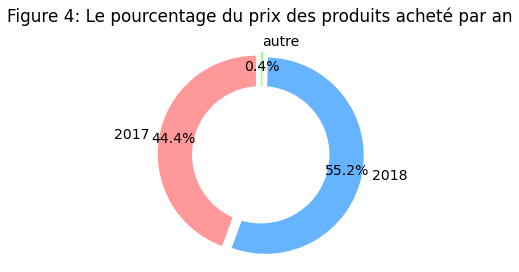

In [16]:
prices = sum(data_items[mask_2016]['price'])

labels = ['2017', '2018','autre']
prices_2017 = sum(data_items[mask_2017]['price'])*100/sum(data_items_clean['price'])
prices_2018 = sum(data_items[mask_2018]['price'])*100/sum(data_items_clean['price']) 
prices = [prices_2017, prices_2018, 100-(prices_2017+prices_2018)]
colors = ['#ff9999','#66b3ff','#99ff99']

explode = (0.05,0.05,0.05)
fig1, ax1 = pl.subplots()
ax1.pie(prices, colors = colors, labels=labels, autopct='%1.1f%%', startangle=90, pctdistance=0.85, explode = explode)
centre_circle = pl.Circle((0,0),0.70,fc='white')
fig = pl.gcf()
fig.gca().add_artist(centre_circle)
pl.title("Figure 4: Le pourcentage du prix des produits acheté par an", pad=20)

ax1.axis('equal')  
pl.tight_layout()
pl.show()

### C-4) data_payments

In [17]:
data_payments_clean = data_payments.drop_duplicates()

In [18]:
payments_list = data_payments_clean['payment_type'].unique()
payments_sum = np.array([])
for payments in payments_list:
    payments_sum = np.append(payments_sum, sum(data_payments[data_payments['payment_type']==payments]['payment_value']))

In [19]:
d = {'payment_type': payments_list, 'payments_sum': payments_sum}
df = pd.DataFrame(data=d)

In [20]:
df

,payment_type,payments_sum
0,credit_card,1.254208e+07
1,boleto,2.869361e+06
2,voucher,3.794369e+05
3,debit_card,2.179898e+05
4,not_defined,0.000000e+00


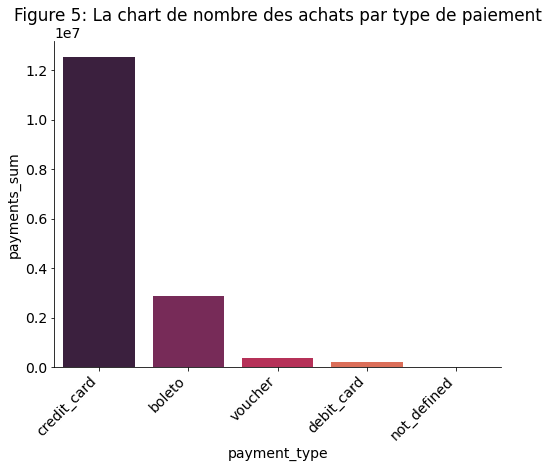

In [21]:
pl.figure(figsize=(8,6))
ax = sns.barplot(x="payment_type", y="payments_sum", data=df, palette="rocket")
pl.xticks(rotation=45,ha='right', fontsize = 14)
pl.title("Figure 5: La chart de nombre des achats par type de paiement", pad=20)
sns.despine()

### C-5) data_reviews

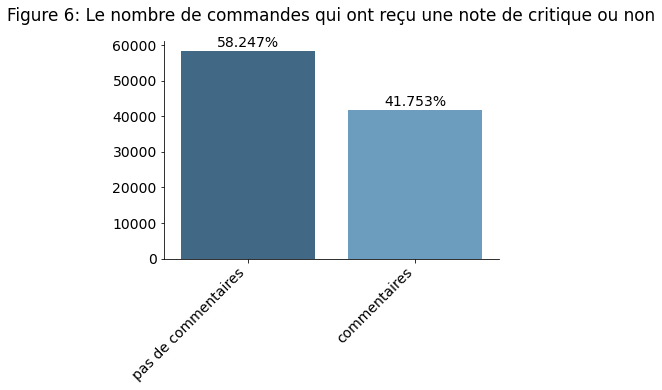

In [22]:
x = ['pas de commentaires', 'commentaires']
y1 = data_reviews['review_comment_message'].isnull().sum()
y2 = len(data_reviews)-data_reviews['review_comment_message'].isnull().sum()
y = [y1,y2]
pl.figure(figsize=(6,4))
plots = sns.barplot(x=x, y=y, palette="Blues_d")
pl.xticks(rotation=45,ha='right', fontsize = 14)
sns.despine()
pl.title("Figure 6: Le nombre de commandes qui ont reçu une note de critique ou non", pad=20)

total = len(data_reviews['review_comment_message'])
for p in plots.patches:
    percentage = f'{100 * p.get_height() / total:.3f}%\n'
   # percent = np.append(percent, np.round(100 * p.get_height() / total,4))
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    plots.annotate(percentage, (x, y), ha='center', va='center')

Text(0.5, 1.0, 'Figure 7: Le nombre de commandes vs. une note de critique')

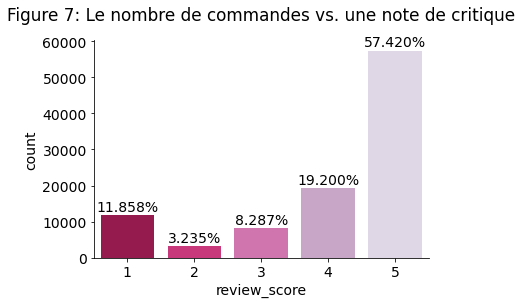

In [23]:
g = sns.countplot(x="review_score",data=data_reviews,palette="PuRd_r")
total = len(data_reviews['review_score'])
sns.despine()
for p in g.patches:
    percentagen = f'{100 * p.get_height() / total:.3f}%\n'
   # percent = np.append(percent, np.round(100 * p.get_height() / total,4))
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    g.annotate(percentagen, (x, y), ha='center', va='center')
pl.title("Figure 7: Le nombre de commandes vs. une note de critique", pad=20)

### C-6) data_orders

In [24]:
data_orders

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00
...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28 00:00:00
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00


Text(0.5, 1.0, 'Figure 8: Le nombre de commandes vs le status de la commande')

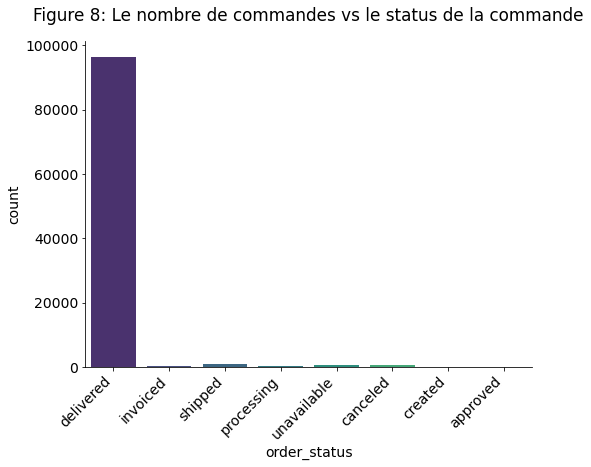

In [25]:
pl.figure(figsize=(8,6))
g = sns.countplot(x="order_status",data=data_orders,palette="viridis")
pl.xticks(rotation=45,ha='right', fontsize = 14)
sns.despine()
pl.title("Figure 8: Le nombre de commandes vs le status de la commande", pad=20)

In [26]:
data_orders_delivered = data_orders[data_orders['order_status']=='delivered']

<font color='darkblue'><font size="3">
Dans cette étude, nous somme interessé par les commandes délivrés. \
P.S: Nous pouvons garder le dataframe sans filters et segmenter les clients via le status de la commande
</font></font>

### C-7) data_products

In [27]:
data_products

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0
...,...,...,...,...,...,...,...,...,...
32946,a0b7d5a992ccda646f2d34e418fff5a0,moveis_decoracao,45.0,67.0,2.0,12300.0,40.0,40.0,40.0
32947,bf4538d88321d0fd4412a93c974510e6,construcao_ferramentas_iluminacao,41.0,971.0,1.0,1700.0,16.0,19.0,16.0
32948,9a7c6041fa9592d9d9ef6cfe62a71f8c,cama_mesa_banho,50.0,799.0,1.0,1400.0,27.0,7.0,27.0
32949,83808703fc0706a22e264b9d75f04a2e,informatica_acessorios,60.0,156.0,2.0,700.0,31.0,13.0,20.0


In [28]:
data_products['volume_cm3'] = data_products["product_length_cm"]*data_products["product_height_cm"]*data_products["product_width_cm"]

In [29]:
data_products.drop(columns=["product_length_cm","product_height_cm","product_width_cm"], inplace=True)

Text(0.5, 1.0, 'Figure 9: La répartition du poids du produit en fonction de son volume')

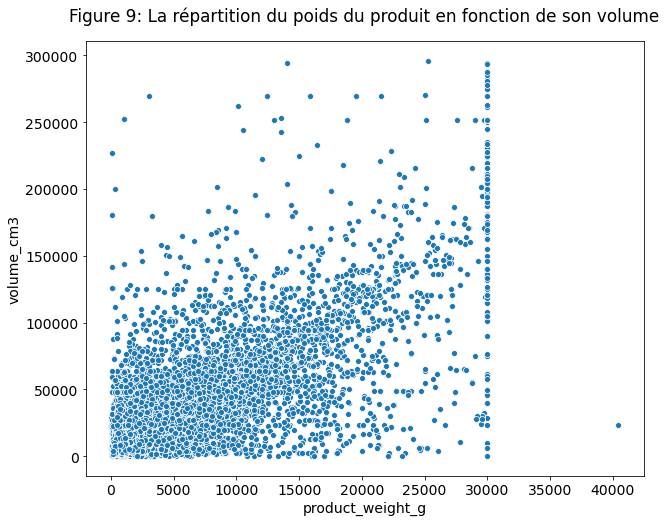

In [30]:
pl.figure(figsize=(10,8))
sns.scatterplot(data=data_products, x="product_weight_g", y='volume_cm3')
pl.title("Figure 9: La répartition du poids du produit en fonction de son volume", pad=20)

### C-8) data_sellers

In [31]:
data_sellers

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP
...,...,...,...,...
3090,98dddbc4601dd4443ca174359b237166,87111,sarandi,PR
3091,f8201cab383e484733266d1906e2fdfa,88137,palhoca,SC
3092,74871d19219c7d518d0090283e03c137,4650,sao paulo,SP
3093,e603cf3fec55f8697c9059638d6c8eb5,96080,pelotas,RS


Text(0.5, 1.0, 'Figure 10: Nombre de sellers par état')

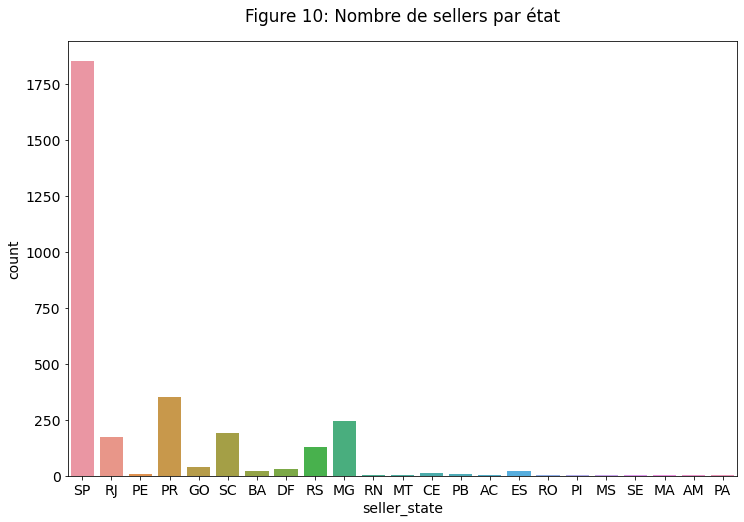

In [32]:
pl.figure(figsize=(12,8))
ax = sns.countplot(x="seller_state", data=data_sellers)
pl.title("Figure 10: Nombre de sellers par état", pad=20)

## D) merging the data

In [33]:
data_customers_orders = pd.merge(data_customers, data_orders_delivered, on='customer_id')

In [34]:
data_customers_orders

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05 00:00:00
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06 00:00:00
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13 00:00:00
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10 00:00:00
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...
96473,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP,6760e20addcf0121e9d58f2f1ff14298,delivered,2018-04-07 15:48:17,2018-04-07 16:08:45,2018-04-11 02:08:36,2018-04-13 20:06:37,2018-04-25 00:00:00
96474,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP,9ec0c8947d973db4f4e8dcf1fbfa8f1b,delivered,2018-04-04 08:20:22,2018-04-04 08:35:12,2018-04-05 18:42:35,2018-04-11 18:54:45,2018-04-20 00:00:00
96475,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE,fed4434add09a6f332ea398efd656a5c,delivered,2018-04-08 20:11:50,2018-04-08 20:30:03,2018-04-09 17:52:17,2018-05-09 19:03:15,2018-05-02 00:00:00
96476,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS,e31ec91cea1ecf97797787471f98a8c2,delivered,2017-11-03 21:08:33,2017-11-03 21:31:20,2017-11-06 18:24:41,2017-11-16 19:58:39,2017-12-05 00:00:00


In [35]:
data_previous_items = pd.merge(data_customers_orders, data_items_clean, on='order_id')

In [36]:
data_previous_sellers = pd.merge(data_previous_items, data_sellers, on='seller_id')

In [37]:
data_previous_reviews = pd.merge(data_previous_sellers, data_reviews, on='order_id')

In [38]:
data_previous_payments = pd.merge(data_previous_reviews, data_payments_clean, on='order_id')

In [39]:
data_previous_product = pd.merge(data_previous_payments, data_products, on='product_id')

In [40]:
data_final = data_previous_product

In [41]:
data_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 115728 entries, 0 to 115727
Data columns (total 37 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   customer_id                    115728 non-null  object 
 1   customer_unique_id             115728 non-null  object 
 2   customer_zip_code_prefix       115728 non-null  int64  
 3   customer_city                  115728 non-null  object 
 4   customer_state                 115728 non-null  object 
 5   order_id                       115728 non-null  object 
 6   order_status                   115728 non-null  object 
 7   order_purchase_timestamp       115728 non-null  object 
 8   order_approved_at              115713 non-null  object 
 9   order_delivered_carrier_date   115726 non-null  object 
 10  order_delivered_customer_date  115720 non-null  object 
 11  order_estimated_delivery_date  115728 non-null  object 
 12  order_item_id                 

In [42]:
data_final.describe()

,customer_zip_code_prefix,order_item_id,price,freight_value,seller_zip_code_prefix,review_score,payment_sequential,payment_installments,payment_value,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,volume_cm3
count,115728.000000,115728.000000,115728.000000,115728.000000,115728.000000,115728.000000,115728.000000,115728.000000,115728.000000,114090.000000,114090.000000,114090.000000,115708.000000,115708.000000
mean,35080.724017,1.197014,119.915650,19.982053,24452.894658,4.065282,1.091266,2.940758,171.811408,48.802963,784.830581,2.206390,2105.742654,15294.682114
std,29855.429243,0.701183,182.670266,15.717960,27586.248398,1.359476,0.686714,2.776260,265.636486,10.016392,650.536962,1.717925,3772.604838,23458.485578
min,1003.000000,1.000000,0.850000,0.000000,1001.000000,1.000000,1.000000,0.000000,0.000000,5.000000,4.000000,1.000000,0.000000,168.000000
25%,11310.000000,1.000000,39.900000,13.080000,6429.000000,4.000000,1.000000,1.000000,60.850000,42.000000,345.000000,1.000000,300.000000,2856.000000
50%,24320.000000,1.000000,74.900000,16.280000,13660.000000,5.000000,1.000000,2.000000,108.110000,52.000000,600.000000,1.000000,700.000000,6580.000000
75%,58809.750000,1.000000,132.900000,21.160000,27930.000000,5.000000,1.000000,4.000000,188.940000,57.000000,983.000000,3.000000,1800.000000,18450.000000
max,99980.000000,21.000000,6735.000000,409.680000,99730.000000,5.000000,26.000000,24.000000,13664.080000,76.000000,3992.000000,20.000000,40425.000000,296208.000000


In [43]:
data_final.drop_duplicates(inplace=True)

In [44]:
data_final.columns

Index(['customer_id', 'customer_unique_id', 'customer_zip_code_prefix',
       'customer_city', 'customer_state', 'order_id', 'order_status',
       'order_purchase_timestamp', 'order_approved_at',
       'order_delivered_carrier_date', 'order_delivered_customer_date',
       'order_estimated_delivery_date', 'order_item_id', 'product_id',
       'seller_id', 'shipping_limit_date', 'price', 'freight_value',
       'seller_zip_code_prefix', 'seller_city', 'seller_state', 'review_id',
       'review_score', 'review_comment_title', 'review_comment_message',
       'review_creation_date', 'review_answer_timestamp', 'payment_sequential',
       'payment_type', 'payment_installments', 'payment_value',
       'product_category_name', 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'volume_cm3'],
      dtype='object')

In [45]:
data_final.drop(columns=['product_photos_qty','product_name_lenght','review_comment_title','order_status'], inplace=True)

In [46]:
data_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 115728 entries, 0 to 115727
Data columns (total 33 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   customer_id                    115728 non-null  object 
 1   customer_unique_id             115728 non-null  object 
 2   customer_zip_code_prefix       115728 non-null  int64  
 3   customer_city                  115728 non-null  object 
 4   customer_state                 115728 non-null  object 
 5   order_id                       115728 non-null  object 
 6   order_purchase_timestamp       115728 non-null  object 
 7   order_approved_at              115713 non-null  object 
 8   order_delivered_carrier_date   115726 non-null  object 
 9   order_delivered_customer_date  115720 non-null  object 
 10  order_estimated_delivery_date  115728 non-null  object 
 11  order_item_id                  115728 non-null  int64  
 12  product_id                    

## E) Filtrer le DataFrame en gardant les variables pertinentes -- corrMatrix

In [47]:
counts = data_final['customer_unique_id'].value_counts()
data_final_reduit = data_final[~data_final['customer_unique_id'].isin(counts[counts <= 2].index)]

data_object = data_final_reduit.select_dtypes('object')
data_numbers = data_final_reduit.select_dtypes('number')

### E-1) Numerical Data

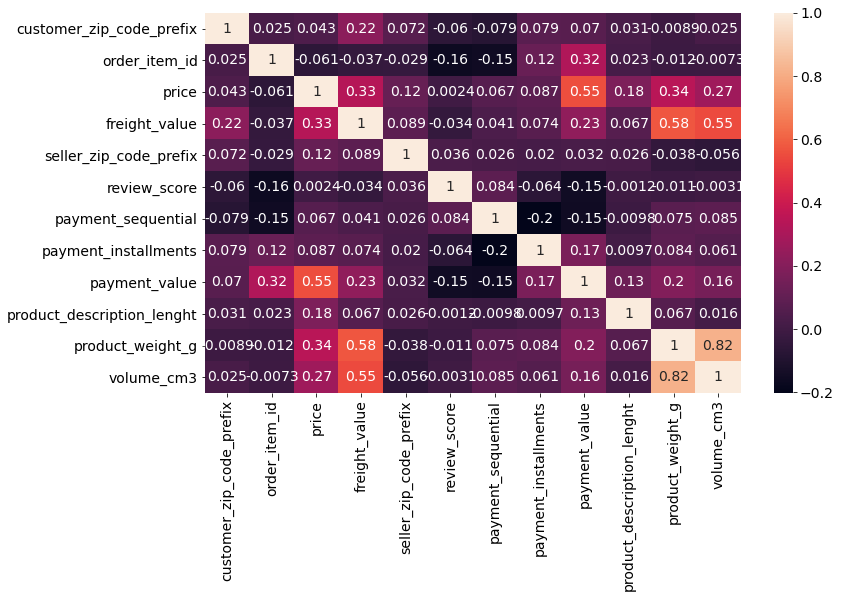

In [48]:
pl.figure(figsize=(12, 7))
Matrix = data_numbers.corr()
#corrMatrix = df.corr()
sns.heatmap(Matrix, annot=True)

### E-2) Categorical Data

<font color='darkblue'><font size="3">
Dans cette partie, nous appliquons Cramers V statistiques sur les varibales catégorielle du Dataframe.
Ce code est crée et publié par ["Wicher Bergsma"](https://www.sciencedirect.com/science/article/abs/pii/S1226319212001032)
</font></font>

In [49]:
#def cramers_v(x, y):
#    confusion_matrix = pd.crosstab(x,y)
#    chi2 = ss.chi2_contingency(confusion_matrix)[0]
#    n = confusion_matrix.sum().sum()
#    phi2 = chi2/n
#    r,k = confusion_matrix.shape
#    phi2corr = max(0, phi2-((k-1)*(r-1))/(n-1))
#    rcorr = r-((r-1)**2)/(n-1)
#    kcorr = k-((k-1)**2)/(n-1)
#    return np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))
def cramers_v(confusion_matrix):
    """ calculate Cramers V statistic for categorial-categorial association.
        uses correction from Bergsma and Wicher,
        Journal of the Korean Statistical Society 42 (2013): 323-328
    """
    chi2 = scipy.stats.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

In [54]:
import scipy
liste = data_object.columns
matrix = np.identity(len(liste))
for i in range(len(liste)):
    for j in range(len(liste)):
        confusion_matrix = pd.crosstab(index=data_object[liste[i]], columns=data_object[liste[j]])
        matrix[i,j] = cramers_v(confusion_matrix.values)
data_matrix = pd.DataFrame(matrix, columns = liste, index = liste)        

In [55]:
data_matrix.to_csv("data_matrix_correlation_categorical.csv",index=False)
#data_matrix = pd.read_csv("data_matrix_correlation_categorical.csv")

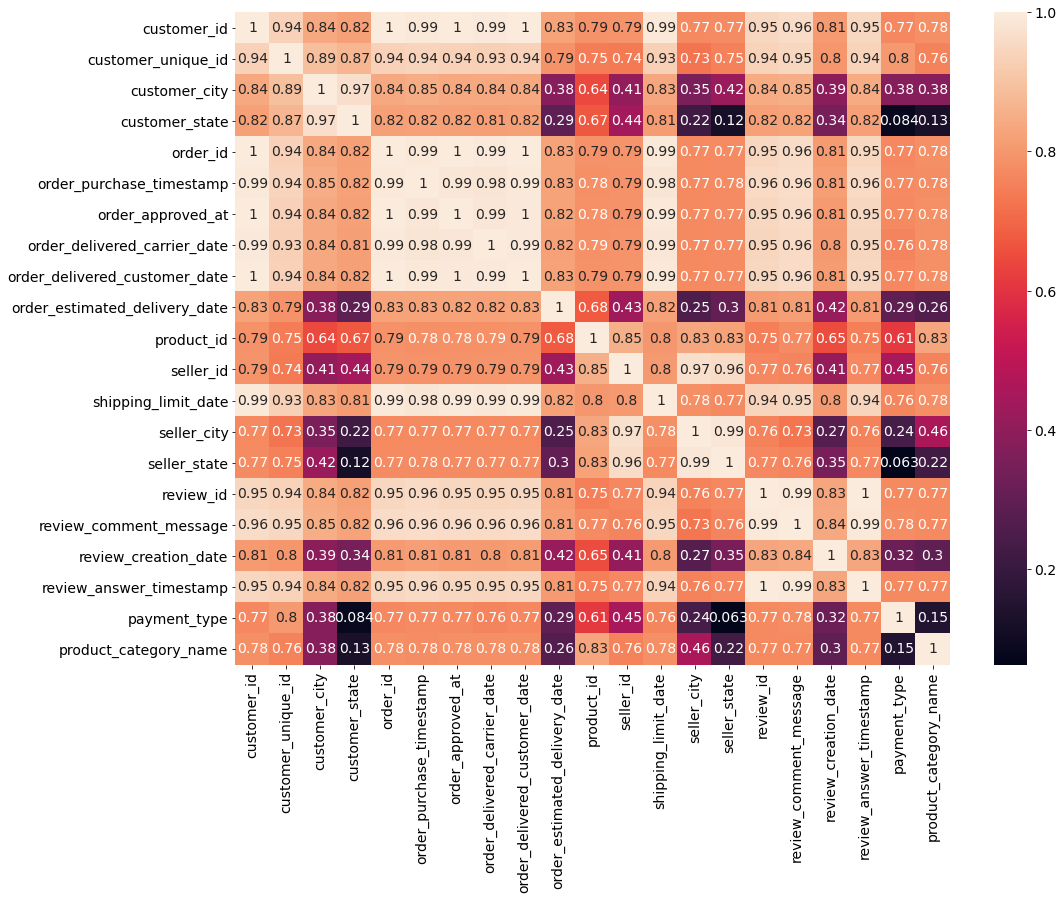

In [57]:
#liste = data_object.columns
#matrix = np.identity(len(liste))

data_matrix.index = liste
pl.figure(figsize=(16, 12))
sns.heatmap(data_matrix, annot=True)

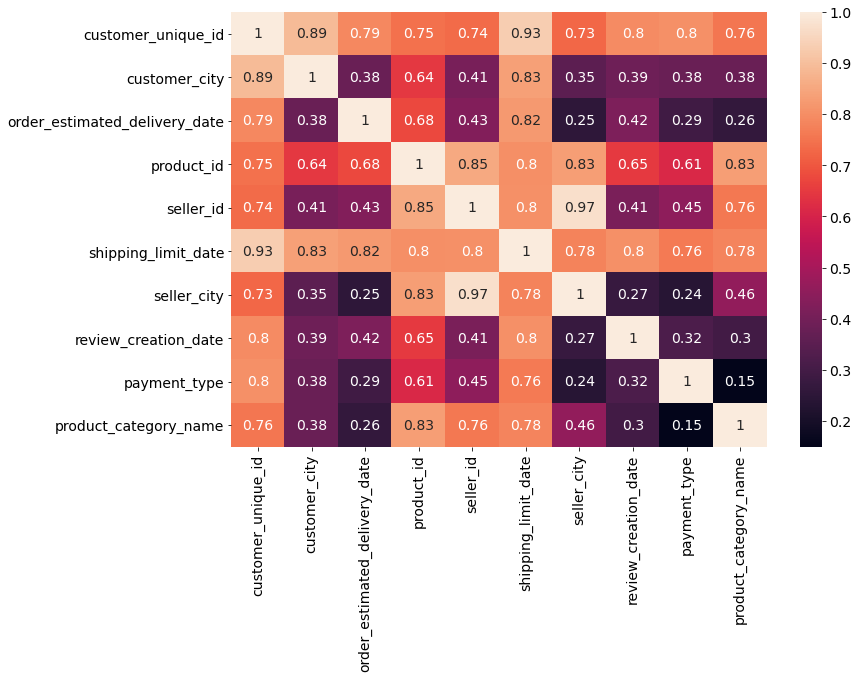

In [58]:
data_matrix_test = data_matrix.drop(columns=["review_id","order_id","order_purchase_timestamp","order_approved_at","order_delivered_customer_date",\
                  "review_comment_message","review_answer_timestamp","customer_id","customer_state","seller_state","order_delivered_carrier_date"],\
                                   index = ["review_id","order_id","order_purchase_timestamp","order_approved_at","order_delivered_customer_date",\
                        "review_comment_message","review_answer_timestamp","customer_id","customer_state","seller_state","order_delivered_carrier_date"])

pl.figure(figsize=(12, 8))
sns.heatmap(data_matrix_test, annot=True)

In [59]:
data = data_final.drop(columns=["review_id","order_id","order_purchase_timestamp","order_approved_at","order_delivered_customer_date",\
                  "review_comment_message","review_answer_timestamp","customer_id","customer_state","seller_state","order_delivered_carrier_date",\
                  'customer_city','review_creation_date','seller_city','payment_installments','product_description_lenght','product_weight_g','volume_cm3'])

In [60]:
data.dropna(inplace=True)
data.isna().sum()

customer_unique_id               0
customer_zip_code_prefix         0
order_estimated_delivery_date    0
order_item_id                    0
product_id                       0
seller_id                        0
shipping_limit_date              0
price                            0
freight_value                    0
seller_zip_code_prefix           0
review_score                     0
payment_sequential               0
payment_type                     0
payment_value                    0
product_category_name            0
dtype: int64

## F) DataFrame cleaning rows

<font color='darkblue'><font size="3">
Pour une meilleure étude et analyse, nous avons décidé de filtrer le DataFrame final par année. Nous allons choisir une année pour y travailler, l'année doit être la plus récente et avec de grandes données, nous avons donc choisi 2018.
</font></font>

In [61]:
data_clean = data.drop_duplicates(keep='first', ignore_index=False)
data_2018 = data_clean[pd.DatetimeIndex(data_clean['order_estimated_delivery_date']).year==2018]

<font color='darkblue'><font size="3">
Dans la partie suivante, nous nous débarrassons des "lignes multiples" qu'un client peut avoir s'il a acheté l'article plus d'une fois par commande, ou s'il a payé l'article acheté en plusieurs fois. 
    
<b>Explication:</b> Pour un unique client, nous vérifions si sa liste des achats contient un produit ou plus.
* si sa liste contient un seul produit, nous attribuons: `['payment_sequential'].max()` au column du ['payment_sequential'], `['order_item_id'].max()` au ['order_item_id'] et regroupons ['payment_type'] dans une seul liste (`['payment_type'].unique().tolist()`)
* si la liste contient plus qu'un produit, Nous suivons la même procédure que précédemment, mais pour chaque produit de la liste.
    
De cette manière, nous évitons de nous répéter et de compter les clients ou les produits/prix plus que la situation réelle.
</font></font>

In [62]:
unique_customer = data_2018['customer_unique_id'].unique().tolist()
for customer in unique_customer:
    #data_clean[data_clean['customer_unique_id']==customer]
    if len(data_2018[data_2018['customer_unique_id']==customer]['product_id'].unique())==1:
        data_2018.loc[data_2018['customer_unique_id']==customer,'payment_sequential'] = data_2018[data_2018['customer_unique_id']==customer]['payment_sequential'].max()
        data_2018.loc[data_2018['customer_unique_id']==customer,'order_item_id'] = data_2018[data_2018['customer_unique_id']==customer]['order_item_id'].max()
        data_2018.loc[data_2018['customer_unique_id']==customer,'payment_type'] = str(data_2018[data_2018['customer_unique_id']==customer]['payment_type'].unique().tolist())
        
    else:
        list_item = data_2018[data_2018['customer_unique_id']==customer]['product_id'].unique().tolist()
        for item in list_item:
            
            data_2018.loc[(data_2018['customer_unique_id']==customer)&(data_2018['product_id']==item),'payment_sequential'] = data_2018.loc[(data_2018['customer_unique_id']==customer)&(data_2018['product_id']==item),'payment_sequential'].max()
            data_2018.loc[(data_2018['customer_unique_id']==customer)&(data_2018['product_id']==item),'order_item_id'] = data_2018.loc[(data_2018['customer_unique_id']==customer)&(data_2018['product_id']==item),'order_item_id'].max()
            data_2018.loc[(data_2018['customer_unique_id']==customer)&(data_2018['product_id']==item),'payment_type'] = str(data_2018.loc[(data_2018['customer_unique_id']==customer)&(data_2018['product_id']==item),'payment_type'].unique().tolist())

C:\Users\Rouba\anaconda3\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [63]:
data_2018.drop_duplicates(inplace=True)

<ipython-input-63-fe1154935023>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_2018.drop_duplicates(inplace=True)


In [64]:
data_2018.to_csv("data_notebook2.csv",index=False)